# week 4
## activation functions
### part 1: implement the ReLU activation function, sigmoid, and tanh activation functions

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.datasets import load_iris

In [16]:
# Load and preprocess the Iris dataset
iris = load_iris()
X = iris.data # Features
y = iris.target.reshape(-1, 1) # Labels reshaped for OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)
y = encoder.fit_transform(y) # One-hot encode labels
scaler = StandardScaler()
X = scaler.fit_transform(X) # Standardize features

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
# Define activation functions and their derivatives
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

def relu(x):
    return np.maximum(0, x)

def relu_derivative(x):
    return (x > 0).astype(float)

def tanh(x):
    return np.tanh(x)

def tanh_derivative(x):
    return 1 - np.tanh(x) ** 2

In [18]:
# Define the MLP class with different activation functions
class MLP:
    def __init__(self, input_size, hidden_size, output_size, activation='sigmoid', learning_rate=0.1,epochs=1000, batch_size=1):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.batch_size = batch_size

        # Choose activation function
        if activation == 'sigmoid':
            self.activation = sigmoid
            self.activation_derivative = sigmoid_derivative
        elif activation == 'relu':
            self.activation = relu
            self.activation_derivative = relu_derivative
        elif activation == 'tanh':
            self.activation = tanh
            self.activation_derivative = tanh_derivative
        else:
            raise ValueError("Invalid activation function. Choose 'sigmoid', 'relu', or 'tanh'.")

        # Initialize weights and biases
        self.W1 = np.random.randn(input_size, hidden_size)
        self.b1 = np.zeros((1, hidden_size))
        self.W2 = np.random.randn(hidden_size, output_size)
        self.b2 = np.zeros((1, output_size))

    def forward(self, X):
        self.z1 = np.dot(X, self.W1) + self.b1
        self.a1 = self.activation(self.z1)
        self.z2 = np.dot(self.a1, self.W2) + self.b2
        self.a2 = sigmoid(self.z2) # Output layer remains sigmoid for classification
        return self.a2

    def backward(self, X, y, output):
        error = y - output
        d_output = error * sigmoid_derivative(output)
        error_hidden = np.dot(d_output, self.W2.T)
        d_hidden = error_hidden * self.activation_derivative(self.a1)

        # Update weights and biases
        self.W2 += np.dot(self.a1.T, d_output) * self.learning_rate
        self.b2 += np.sum(d_output, axis=0, keepdims=True) * self.learning_rate
        self.W1 += np.dot(X.T, d_hidden) * self.learning_rate
        self.b1 += np.sum(d_hidden, axis=0, keepdims=True) * self.learning_rate

        return np.mean(np.abs(error))

    def train(self, X, y):
        self.losses = []
        for epoch in range(self.epochs):
            indices = np.random.permutation(X.shape[0])
            X_shuffled, y_shuffled = X[indices], y[indices]

            for i in range(0, X.shape[0], self.batch_size): # Mini-batch processing
                X_batch = X_shuffled[i:i+self.batch_size]
                y_batch = y_shuffled[i:i+self.batch_size]
                output = self.forward(X_batch)
                loss = self.backward(X_batch, y_batch, output)

                self.losses.append(loss)
                if epoch % 100 == 0:
                    print(f"Epoch {epoch}, Loss: {loss:.4f}")

    def predict(self, X):
        return np.argmax(self.forward(X), axis=1)

In [19]:
# Experiment with different activation functions
activations = ['sigmoid','relu','tanh']

for active in activations:
    print(f"Experimenting with Activation Function: {active}")
    mlp = MLP(input_size=4, hidden_size=5, output_size=3, activation=active, learning_rate=0.1, epochs=1000, batch_size=8)
    mlp.train(X_train, y_train)

Experimenting with Activation Function: sigmoid
Epoch 0, Loss: 0.4497
Epoch 0, Loss: 0.4699
Epoch 0, Loss: 0.4516
Epoch 0, Loss: 0.4697
Epoch 0, Loss: 0.4135
Epoch 0, Loss: 0.4324
Epoch 0, Loss: 0.4893
Epoch 0, Loss: 0.4158
Epoch 0, Loss: 0.3956
Epoch 0, Loss: 0.3869
Epoch 0, Loss: 0.4062
Epoch 0, Loss: 0.4349
Epoch 0, Loss: 0.3482
Epoch 0, Loss: 0.3470
Epoch 0, Loss: 0.3791
Epoch 100, Loss: 0.0756
Epoch 100, Loss: 0.0952
Epoch 100, Loss: 0.0404
Epoch 100, Loss: 0.0613
Epoch 100, Loss: 0.0607
Epoch 100, Loss: 0.0475
Epoch 100, Loss: 0.1044
Epoch 100, Loss: 0.0412
Epoch 100, Loss: 0.0706
Epoch 100, Loss: 0.0649
Epoch 100, Loss: 0.1085
Epoch 100, Loss: 0.0483
Epoch 100, Loss: 0.0452
Epoch 100, Loss: 0.1007
Epoch 100, Loss: 0.0798
Epoch 200, Loss: 0.0525
Epoch 200, Loss: 0.0217
Epoch 200, Loss: 0.1111
Epoch 200, Loss: 0.0488
Epoch 200, Loss: 0.0833
Epoch 200, Loss: 0.0278
Epoch 200, Loss: 0.0711
Epoch 200, Loss: 0.0496
Epoch 200, Loss: 0.0254
Epoch 200, Loss: 0.0599
Epoch 200, Loss: 0.073

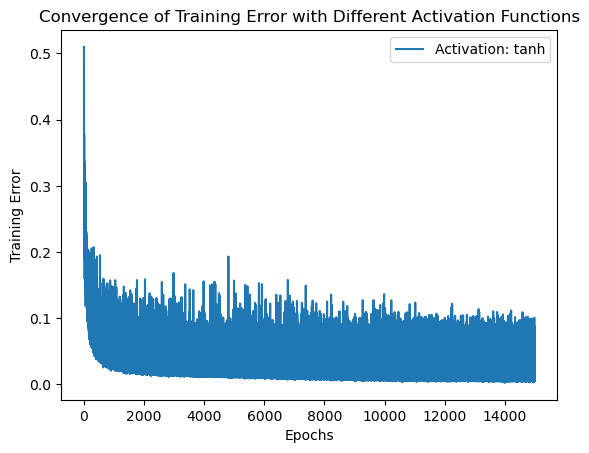

In [20]:
# Plot convergence of training error
plt.plot(mlp.losses, label=f'Activation: {active}')

plt.xlabel('Epochs')

plt.ylabel('Training Error')
plt.title('Convergence of Training Error with Different Activation Functions')
plt.legend()
plt.show()

In [21]:
# Evaluate the last trained model
predictions = mlp.predict(X_test)
y_test_labels = np.argmax(y_test, axis=1)
accuracy = np.mean(predictions == y_test_labels)
print(f"Test Accuracy with {active} activation => {accuracy * 100:.2f}%")

Test Accuracy with tanh activation => 100.00%
